In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path='/content/drive/MyDrive/TRAIN'

In [4]:
test_path='/content/drive/MyDrive/TEST'

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#paths to the train, validation and test image datasets 
train_path = '/content/drive/MyDrive/TRAIN'
valid_path = '/content/drive/MyDrive/TRAIN'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')


Found 275 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [7]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [8]:
import os
print(os.listdir('/content/drive/MyDrive/TRAIN'))

['paper', 'trash', 'plastic', 'glass', 'cardboard', 'metal']


In [9]:
data_path = '/content/drive/MyDrive/TRAIN'

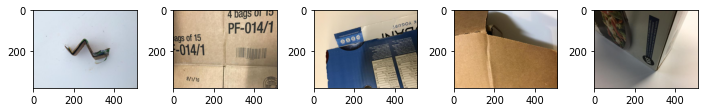

In [10]:
plot_imgs(data_path+'/cardboard')

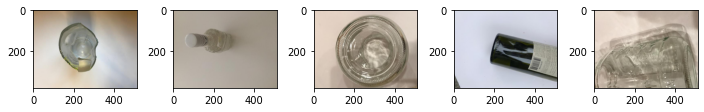

In [11]:
plot_imgs(data_path+'/glass')

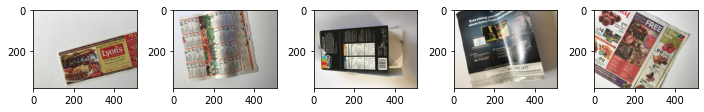

In [12]:
plot_imgs(data_path+'/paper')

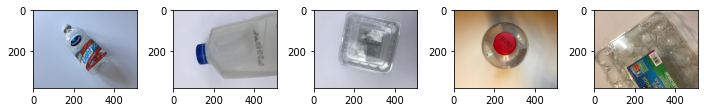

In [13]:
plot_imgs(data_path+'/plastic')

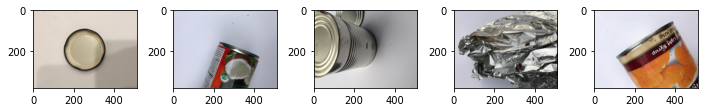

In [14]:
plot_imgs(data_path+'/metal')

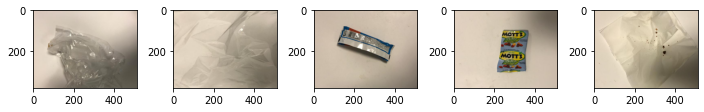

In [15]:
plot_imgs(data_path+'/trash')

In [16]:
batch_size = 32

In [36]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 275 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [37]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [38]:
num_classes = 6

In [39]:
# Build Model
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [40]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model_path="garbage_cnn.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [43]:
num_epochs = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [44]:
# Train Model
history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    callbacks=callbacks_list)

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 1.8970 - accuracy: 0.1968 - val_loss: 1.7931 - val_accuracy: 0.1333

Epoch 00001: val_accuracy improved from -inf to 0.13333, saving model to garbage_cnn.h5
Epoch 2/100
8/8 [==============================] - 8s 976ms/step - loss: 1.7977 - accuracy: 0.1513 - val_loss: 1.7910 - val_accuracy: 0.2667

Epoch 00002: val_accuracy improved from 0.13333 to 0.26667, saving model to garbage_cnn.h5
Epoch 3/100
8/8 [==============================] - 8s 990ms/step - loss: 1.7891 - accuracy: 0.1594 - val_loss: 1.7898 - val_accuracy: 0.1667

Epoch 00003: val_accuracy did not improve from 0.26667
Epoch 4/100
8/8 [==============================] - 8s 977ms/step - loss: 1.7859 - accuracy: 0.2012 - val_loss: 1.7928 - val_accuracy: 0.1000

Epoch 00004: val_accuracy did not improve from 0.26667
Epoch 5/100
8/8 [==============================] - 8s 1s/step - loss: 1.7862 - accuracy: 0.1799 - val_loss: 1.7753 - val_accuracy: 0.1667

Epoch 0

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


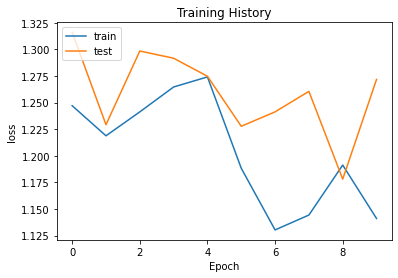

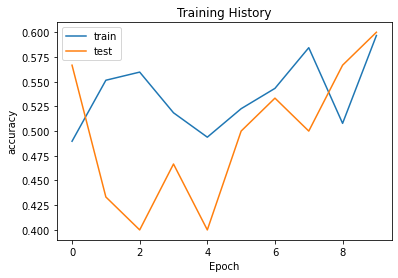

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')
